# Black Body Radiation

In [7]:
import numpy as np
from scipy.integrate import fixed_quad

def integrand(z):
    x = z / (1 - z)
    numerator = z**3
    denominator = (1 - z)**5 * (np.exp(x) - 1)
    return numerator / denominator

# Perform the quadrature integration from 0 to 1
result, _ = fixed_quad(integrand, 0, 1, n=50)  # Adjust n for accuracy

print("Integral result:", result)


Integral result: 6.49393940051489


/tmp/ipykernel_26897/3898322845.py:7: RuntimeWarning: overflow encountered in exp
  denominator = (1 - z)**5 * (np.exp(x) - 1)


Now compare to just explicitly integrating. Both methods agree with each other pretty well!

In [8]:

from scipy.integrate import quad

def integrand(x):
    return x**3 / (np.exp(x) - 1)

# Perform the numerical integration from 0 to infinity
result, error = quad(integrand, 0, np.inf)

print("Integral result:", result)
print("Estimated error:", error)


Integral result: 6.49393940226683
Estimated error: 2.6284700289923758e-09


/tmp/ipykernel_26897/1270180470.py:4: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)


# Orbits

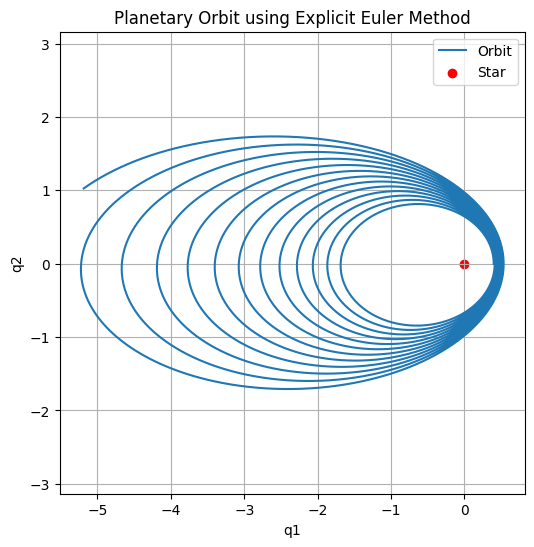

In [11]:
import matplotlib.pyplot as plt

# Given parameters
e = 0.6
T_final = 200
N_steps = 100000

dt = T_final / N_steps  # Time step

# Initial conditions
q1 = 1 - e
q2 = 0
v1 = 0
v2 = np.sqrt((1 + e) / (1 - e))

# Arrays to store results
times = np.linspace(0, T_final, N_steps)
q1_vals = np.zeros(N_steps)
q2_vals = np.zeros(N_steps)

# Explicit Euler integration
for i in range(N_steps):
    q1_vals[i] = q1
    q2_vals[i] = q2
    
    r = (q1**2 + q2**2)**1.5
    a1 = -q1 / r
    a2 = -q2 / r
    
    q1 += dt * v1
    q2 += dt * v2
    v1 += dt * a1
    v2 += dt * a2

# Plot the orbit
plt.figure(figsize=(6,6))
plt.plot(q1_vals, q2_vals, label='Orbit')
plt.scatter([0], [0], color='red', label='Star')  # Star at origin
plt.xlabel("q1")
plt.ylabel("q2")
plt.title("Planetary Orbit using Explicit Euler Method")
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

This approach seems to mostly work, but the orbit is clearly unstable, and energy isn't conserved.

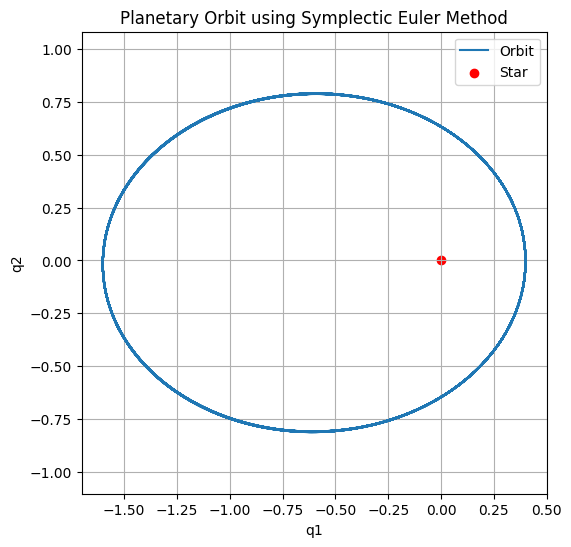

In [12]:
# Given parameters
e = 0.6
T_final = 200
N_steps = 40000

dt = T_final / N_steps  # Time step

# Initial conditions
q1 = 1 - e
q2 = 0
v1 = 0
v2 = np.sqrt((1 + e) / (1 - e))

# Arrays to store results
times = np.linspace(0, T_final, N_steps)
q1_vals = np.zeros(N_steps)
q2_vals = np.zeros(N_steps)

# Symplectic Euler integration
for i in range(N_steps):
    q1_vals[i] = q1
    q2_vals[i] = q2
    
    r = (q1**2 + q2**2)**1.5
    a1 = -q1 / r
    a2 = -q2 / r
    
    # Symplectic step: first update velocity, then position
    v1 += dt * a1
    v2 += dt * a2
    q1 += dt * v1
    q2 += dt * v2

# Plot the orbit
plt.figure(figsize=(6,6))
plt.plot(q1_vals, q2_vals, label='Orbit')
plt.scatter([0], [0], color='red', label='Star')  # Star at origin
plt.xlabel("q1")
plt.ylabel("q2")
plt.title("Planetary Orbit using Symplectic Euler Method")
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

# Gradient Descent

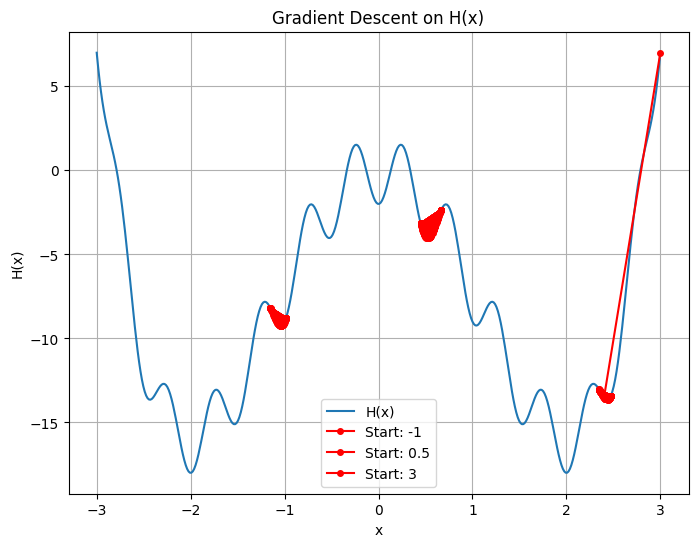

In [15]:
# Define the cost function H(x) and its gradient
def H(x):
    return x**4 - 8*x**2 - 2*np.cos(4*np.pi*x)

def dH_dx(x):
    return 4*x**3 - 16*x + 8*np.pi*np.sin(4*np.pi*x)

# Gradient descent parameters
alpha = 0.01  # Learning rate
tol = 1e-6    # Convergence tolerance
max_iters = 100  # Maximum iterations
initial_guesses = [-1, 0.5, 3]

# Plot the function
x_vals = np.linspace(-3, 3, 400)
y_vals = H(x_vals)
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="H(x)")

# Perform gradient descent for each initial guess
for theta0 in initial_guesses:
    theta = theta0
    trajectory = [theta]
    
    for _ in range(max_iters):
        grad = dH_dx(theta)
        theta_new = theta - alpha * grad
        
        if abs(theta_new - theta) < tol:
            break  # Converged
        
        theta = theta_new
        trajectory.append(theta)
        
    # Plot the descent trajectory
    trajectory = np.array(trajectory)
    plt.plot(trajectory, H(trajectory), 'ro-', markersize=4, label=f"Start: {theta0}")

# Final plot settings
plt.xlabel("x")
plt.ylabel("H(x)")
plt.title("Gradient Descent on H(x)")
plt.legend()
plt.grid()
plt.savefig("gradient_descent_trajectory.png")  # Save the figure locally
plt.show()

Alpha needs to be much lower than I expected it could be. Anything above 0.1 causes the descent to diverge in this case.

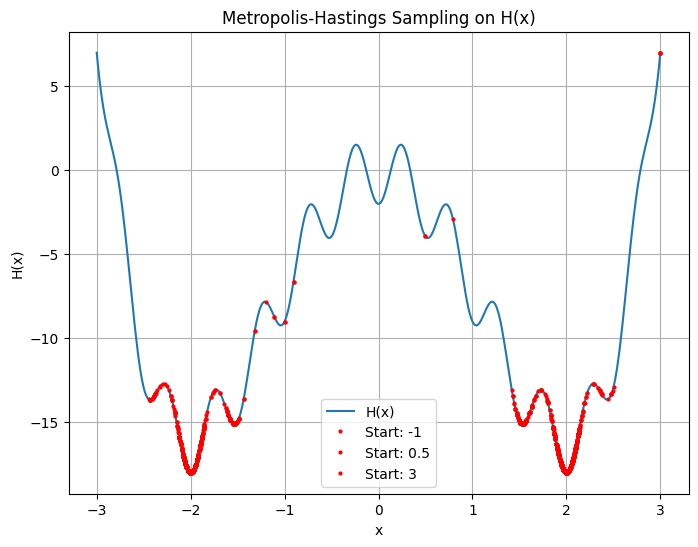

In [16]:
# Define the cost function H(x)
def H(x):
    return x**4 - 8*x**2 - 2*np.cos(4*np.pi*x)

# Metropolis-Hastings parameters
sigma = 0.5  # Standard deviation for proposal step
beta = 1.0  # Inverse temperature (controls acceptance probability)
num_samples = 1000  # Number of steps
initial_guesses = [-1, 0.5, 3]

# Plot the function
x_vals = np.linspace(-3, 3, 400)
y_vals = H(x_vals)
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="H(x)")

# Perform Metropolis-Hastings for each initial guess
for theta0 in initial_guesses:
    theta = theta0
    trajectory = [theta]
    
    for _ in range(num_samples):
        theta_new = theta + np.random.normal(0, sigma)
        
        # Compute the Boltzmann factor ratio
        delta_H = H(theta_new) - H(theta)
        r = np.exp(-beta * delta_H)
        
        # Accept or reject step
        if np.random.rand() < min(1, r):
            theta = theta_new
        
        trajectory.append(theta)
    
    # Plot the trajectory
    trajectory = np.array(trajectory)
    plt.plot(trajectory, H(trajectory), 'ro', markersize=2, label=f"Start: {theta0}")

# Final plot settings
plt.xlabel("x")
plt.ylabel("H(x)")
plt.title("Metropolis-Hastings Sampling on H(x)")
plt.legend()
plt.grid()
plt.savefig("metropolis_hastings_trajectory.png")  # Save the figure locally
plt.show()


This does a way better job of finding global minima, while still converging fairly quickly.